# Machine Learning Analysis and Classification of STV Data

In [1]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
#import libraries
import matplotlib.image as mpimg
import time
#!pip install plotly
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.express as px
from collections import Counter  
from subprocess import call
from IPython.display import Image

############################################################################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



#set mathplot to inline (for jupyter)
%matplotlib inline 

## Read in Data

In [2]:
#read vote data from csv
#input file
constituency="DublinWest2002_merged"
in_csv='../data/processed/'+constituency+'.csv'
#in_csv ='../data/Meath2002.csv'
#in_csv ='../data/DublinNorth2002.csv'
#in_csv ='../data/DublinWest2002.csv'

#read in data (setting 1st row as header)
df = pd.read_csv(in_csv,  header=[0])

#set column names as first line
#drop the numbers column (#df=df.drop(['No.'], 1))
df = df.drop(df.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#reset index to start a 1 and not 0
df.index = df.index + 1

In [3]:
#print input data frame details
print("Print Data Frame (df)")
print(df.head())
print("Print Column names")
print(df.columns)

Print Data Frame (df)
    GP   LB   FF   SP  FF.1   SF   PD   NP   FG  maxValues  Euclid Dist  \
1  4.0  1.0  7.0  3.0   5.0  6.0  8.0  9.0  2.0        9.0    47.771133   
2  7.0  5.0  3.0  9.0   2.0  8.0  1.0  6.0  4.0        9.0    18.954230   
3  NaN  3.0  1.0  5.0   2.0  4.0  NaN  NaN  NaN        5.0    13.553393   
4  6.0  1.0  7.0  3.0   4.0  NaN  5.0  8.0  2.0        8.0    43.698941   
5  5.0  3.0  8.0  1.0   9.0  7.0  4.0  6.0  2.0        9.0    40.591953   

   Avg. Euc. Dist  Seq  
1        5.971392    1  
2        2.369279    1  
3        3.388348    1  
4        6.242706    1  
5        5.073994    1  
Print Column names
Index(['GP', 'LB', 'FF', 'SP', 'FF.1', 'SF', 'PD', 'NP', 'FG', 'maxValues',
       'Euclid Dist', 'Avg. Euc. Dist', 'Seq'],
      dtype='object')


## Data Analysis

In [4]:
#data preprocessing
df.info()

#backup dataset
dataset_clean=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11818 entries, 1 to 11818
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GP              9102 non-null   float64
 1   LB              9473 non-null   float64
 2   FF              8835 non-null   float64
 3   SP              9925 non-null   float64
 4   FF.1            9467 non-null   float64
 5   SF              8223 non-null   float64
 6   PD              9695 non-null   float64
 7   NP              5924 non-null   float64
 8   FG              9673 non-null   float64
 9   maxValues       11818 non-null  float64
 10  Euclid Dist     11818 non-null  float64
 11  Avg. Euc. Dist  11818 non-null  float64
 12  Seq             11818 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1.2 MB


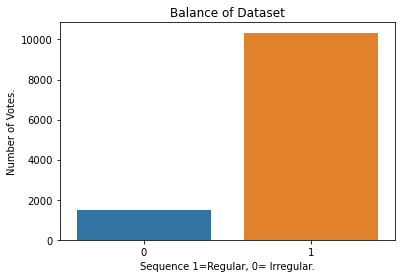

In [5]:
# how balanced is the dataset?
sns.countplot(x='Seq', data = df)
plt.title('Balance of Dataset')
plt.ylabel('Number of Votes.')
plt.xlabel('Sequence 1=Regular, 0= Irregular.')

# Save the histogram
plt.savefig('../images/'+constituency+'_dataset_balance_hist.png')
plt.show()

In [6]:
#rebalance dataset
#print(df.head)
df=df.drop(df.query('Seq == 1').sample(frac=.71).index)

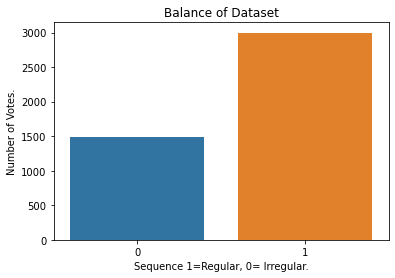

In [7]:
# how balanced is the dataset?
sns.countplot(x='Seq', data = df)
plt.title('Balance of Dataset')
plt.ylabel('Number of Votes.')
plt.xlabel('Sequence 1=Regular, 0= Irregular.')

# Save the histogram
plt.savefig('../images/'+constituency+'_dataset_balanced_hist.png')
plt.show()

### Missing Values

In [8]:
# Replace the '?'s with NaN (read.csv includes conversion of ? to NaN)
#df = df.replace('?', np.NaN)
df = df.replace(np.NaN, 0)
# Drop rows (if you want to delete all rows containing Missing Values)
#datasetq=dataset.dropna()

# Imputation Numbers
# Impute the missing values with mean imputation
#df.fillna(df.mean(), inplace=True)

# Imputation Categorical Data
# Iterate over each column of cc_apps
#for col in df.columns:
    # Check if the column is of object type
 #   if df[col].dtype == 'object':
        # Impute with the most frequent value
  #      df = df.fillna(dataset[col].value_counts().index[0])
#df.iloc[265:290,:]

#backup dataset
dataset_clean=df.copy()

In [9]:
dataset_clean.head()

,GP,LB,FF,SP,FF.1,SF,PD,NP,FG,maxValues,Euclid Dist,Avg. Euc. Dist,Seq
2,7.0,5.0,3.0,9.0,2.0,8.0,1.0,6.0,4.0,9.0,18.954230,2.369279,1
3,0.0,3.0,1.0,5.0,2.0,4.0,0.0,0.0,0.0,5.0,13.553393,3.388348,1
6,4.0,2.0,6.0,9.0,5.0,7.0,1.0,8.0,3.0,9.0,39.074386,4.884298,1
13,1.0,3.0,7.0,6.0,2.0,9.0,5.0,8.0,4.0,9.0,44.065445,5.508181,1
27,7.0,9.0,2.0,3.0,1.0,4.0,5.0,6.0,8.0,9.0,40.928114,5.116014,1


## Feature Engineering

In [10]:
#Feature Engineering
cols = list(df.columns)
#cols.pop()
cat_f = cols[:-4]

cat_features = cat_f
num_features = ['maxValues', 'Euclid Dist', 'Avg. Euc. Dist', 'Seq']
print(cat_features)
print(num_features)
#convert categorical data into "dummy" indicator variables
for variable in cat_features:
    dummies = pd.get_dummies(dataset_clean[cat_features])
    df1= pd.concat([dataset_clean[num_features], dummies],axis=1)

['GP', 'LB', 'FF', 'SP', 'FF.1', 'SF', 'PD', 'NP', 'FG']
['maxValues', 'Euclid Dist', 'Avg. Euc. Dist', 'Seq']


/anaconda38/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



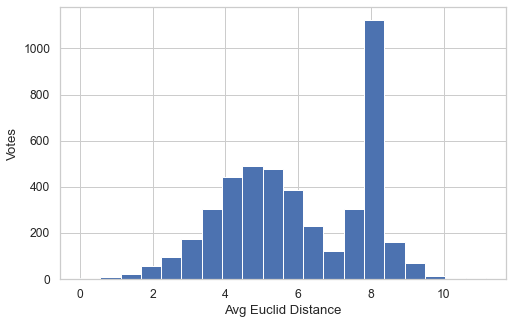

In [11]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df1['Avg. Euc. Dist'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Avg Euclid Distance', ylabel='Votes');

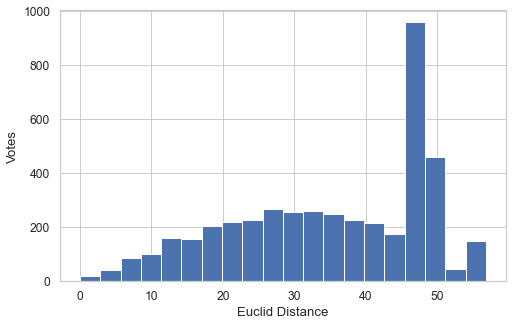

In [12]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df1['Euclid Dist'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Euclid Distance', ylabel='Votes');

## Feature Extraction

### Split Data Set into Test and Train

In [13]:
#Split Data Set into Test and Train
features = list(df1)
features.pop(6)
x = df1.loc[:,features].values
y = df1.loc[:,['Seq']].values #target var

In [14]:
X = StandardScaler().fit_transform(x) 

In [15]:
pd.DataFrame(data = X, columns = features).head()

,maxValues,Euclid Dist,Avg. Euc. Dist,Seq,GP,LB,SP,FF.1,SF,PD,NP,FG
0,1.290701,-1.179338,-1.898835,0.70344,1.294177,1.051237,2.666718,-0.292053,1.674308,-1.055499,0.898945,0.262697
1,-1.101910,-1.578519,-1.362474,0.70344,-1.405935,0.203206,0.841650,-0.292053,0.212999,-1.487535,-0.834458,-1.376986
2,1.290701,0.307763,-0.575119,0.70344,0.136986,-0.220810,2.666718,0.891305,1.308980,-1.055499,1.476745,-0.147224
3,1.290701,0.676657,-0.246754,0.70344,-1.020205,0.203206,1.297917,-0.292053,2.039635,0.672645,1.476745,0.262697
4,1.290701,0.444774,-0.453161,0.70344,1.294177,2.747299,-0.070884,-0.686506,0.212999,0.672645,0.898945,1.902379


In [16]:
# Feature Extraction - Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform (x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3','PC4','PC5']) #PC = Principal component 
principalDf.head()

,PC1,PC2,PC3,PC4,PC5
0,14.619863,8.161425,-1.941888,-1.226227,5.673060
1,21.894945,-1.592652,0.983130,-1.955449,3.894726
2,-5.155072,5.268262,2.755283,-2.767899,2.517645
3,-10.061364,4.717257,0.233293,-4.445602,1.783288
4,-6.686314,5.672441,-6.408932,3.049083,0.430399


In [17]:
finalDf = pd.concat([principalDf,df1[['Seq']]], axis = 1)
#finalDf.tail()

In [18]:
# drop the target column
#Target= finalDf['A16']          
#df2=finalDf.drop(['A16'],axis=1)
Target= df1['Seq']          
df2=df1.drop(['Seq'],axis=1)

In [19]:
#split dataset(df2) into training and testing 
X_train_nonstd,X_test_nonstd,Y_train,Y_test = train_test_split(df2,Target,test_size=0.20,random_state = 30)

In [20]:
#Standardization
sc=StandardScaler()
X_train=sc.fit_transform(X_train_nonstd)
X_test=sc.transform(X_test_nonstd)

In [21]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, Y_train)
# transform train input data
X_train = fs.transform(X_train)
# transform test input data
X_test = fs.transform(X_test)

Feature 0: 30.907890
Feature 1: 3651.846005
Feature 2: 4939.324565
Feature 3: 0.006958
Feature 4: 161.666306
Feature 5: 17.428691
Feature 6: 312.207478
Feature 7: 1.256347
Feature 8: 83.135626
Feature 9: 72.332345
Feature 10: 142.342564
Feature 11: 13.755411


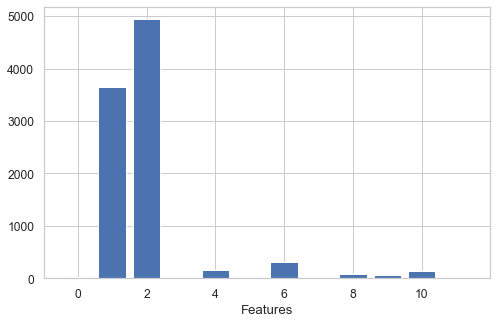

In [22]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Features')
plt.show()

In [ ]:
import io
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Model 
model = Sequential()
model.add(LSTM(100, input_shape= (10, 5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 1000)


## Logistic Regression

In [23]:
#Logistic Regression
model = LogisticRegression(solver='lbfgs')
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % ("Logistic Regression", cv_results.mean(), cv_results.std()))

Logistic Regression: 0.992741 (0.005030)


In [24]:
model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
start = time.time()

model = LogisticRegression()
model.fit(X_train, Y_train)

end = time.time()
training_time = format((end-start)*1000)
print("time elapsed {} milli seconds".format((end-start)*1000))

time elapsed 47.769784927368164 milli seconds


In [26]:
# make class predictions for the testing set
start = time.time()
y_pred_class = model.predict(X_test)
end = time.time()
test_time = format((end-start)*1000)
print("time elapsed {} milli seconds".format((end-start)*1000))

time elapsed 1.4231204986572266 milli seconds


[[308   0]
 [  9 579]]


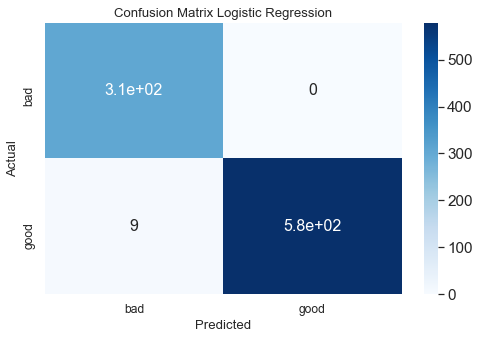

In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred_class)
print(conf_matrix) #display confusion matrix
y_true = ["good", "bad"]
#y_pred = ["good", "bad"]
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm.dtypes
plt.figure(figsize = (8,5))
cm_title='Confusion Matrix' + " Logistic Regression"
plt.title(cm_title)
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
# Save the Pie
plt.savefig('../images/'+cm_title+'_confusion_matrix.png')
plt.show()

In [28]:
#[row, column]
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Classification Accuracy
# use float to perform true division, not integer division
accuracy = ((TP + TN) / float(TP + TN + FP + FN))
#accuracy = accuracy_score(Y_test, y_pred_class)
print("Accuracy : %.4f" %accuracy)

# Classification Error/Misclassification Rate = 1 - accuracy
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error Rate : %.4f" %(classification_error))

# Precision
precision = TP / float(TP + FP)
print("Precision : %.4f" %(precision))
#print("Precision : %.4f" %(precision_score(Y_test, y_pred)))

# Sensitivity or Recall or True Positive Rate
sensitivity = TP / float(FN + TP)
print("Sensitivity/Recall :%.4f" %(sensitivity))
#print("Sensitivity/Recall : %.4f" %(recall_score(Y_test, y_pred)))

# Specificity oe true negative rate
specificity = TN / (TN + FP)
print("Specificity : %.4f" %(specificity))

# False Positive Rate (1 - specificity))
false_positive_rate = FP / float(TN + FP)
print("False Positive Rate : %.4f" %(false_positive_rate))

# False Negative Rate
false_negative_rate = FN / float(TP + FN)
print("False Negative Rate : %.4f" %(false_negative_rate))

# F1 Measure (F1 Score) = 2 * ((precision * sensitivity)/(precision + sensitivity))
F1_measure = 2* ((precision * sensitivity)/(precision + sensitivity))
print("F1-Measure : %.4f" %(F1_measure))

# Cross Validation is used to check the model is not overfitting
c_v_score = cross_val_score(model,X_train,Y_train,cv = 10).mean()
print("cross val score: : %.4f" %(c_v_score))

Accuracy : 0.9900
Classification Error Rate : 0.0100
Precision : 1.0000
Sensitivity/Recall :0.9847
Specificity : 1.0000
False Positive Rate : 0.0000
False Negative Rate : 0.0153
F1-Measure : 0.9923
cross val score: : 0.9933




Area Under Curve (Logistic Regression): 0.99




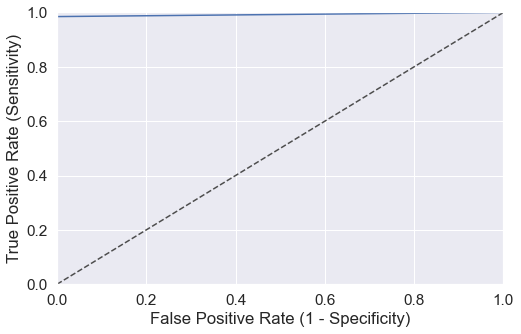

In [29]:
# ROC Curve   
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_class)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print ("\n")
print ("Area Under Curve (Logistic Regression): %.2f" %auc(fpr, tpr))
print ("\n")
plt.show()
a_u_c = auc(fpr, tpr)

In [30]:
matrix_table=[["Logistic Regression", accuracy, classification_error, precision, 
               sensitivity, specificity, false_positive_rate, F1_measure, a_u_c, c_v_score,"{:.4f}".format(float(training_time)), 
               "{:.4f}".format((float)(test_time))]]

## SVM

In [31]:
params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'degree': [3, 4, 5]}

start = time.time()

clf = SVC(random_state=42)
grid_search_cv = GridSearchCV(clf, params)
grid_search_cv.fit(X_train, Y_train)

#run best estimator
clf = grid_search_cv.best_estimator_
clf.fit(X_train,Y_train)

end = time.time()
training_time = format((end-start)*1000)
print("time elapsed {} milli seconds".format((end-start)*1000))

time elapsed 26351.03678703308 milli seconds


In [32]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

SVC(C=0.85, kernel='poly', random_state=42)
{'C': 0.85, 'degree': 3, 'kernel': 'poly'}


In [33]:
# run SVM predictor
start=time.time()
y_pred = clf.predict(X_test)
end = time.time()
test_time = format((end-start)*1000)
print("time elapsed {} milli seconds".format((end-start)*1000))

time elapsed 27.862071990966797 milli seconds


[[308   0]
 [  9 579]]


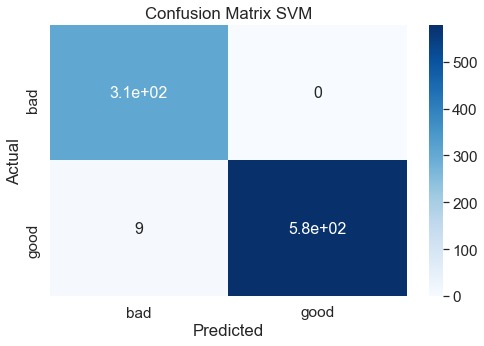

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred_class)
print(conf_matrix) #display confusion matrix
y_true = ["good", "bad"]
#y_pred = ["good", "bad"]
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm.dtypes
plt.figure(figsize = (8,5))

cm_title='Confusion Matrix' + " SVM"
plt.title(cm_title)
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
# Save the Pie
plt.savefig('../images/'+cm_title+'_confusion_matrix.png')
plt.show()

In [35]:
#[row, column]
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Classification Accuracy
# use float to perform true division, not integer division
accuracy = ((TP + TN) / float(TP + TN + FP + FN))
#accuracy = accuracy_score(Y_test, y_pred_class)
print("Accuracy : %.4f" %accuracy)

# Classification Error/Misclassification Rate = 1 - accuracy
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error Rate : %.4f" %(classification_error))

# Precision
precision = TP / float(TP + FP)
print("Precision : %.4f" %(precision))
#print("Precision : %.4f" %(precision_score(Y_test, y_pred)))

# Sensitivity or Recall or True Positive Rate
sensitivity = TP / float(FN + TP)
print("Sensitivity/Recall :%.4f" %(sensitivity))
#print("Sensitivity/Recall : %.4f" %(recall_score(Y_test, y_pred)))

# Specificity oe true negative rate
specificity = TN / (TN + FP)
print("Specificity : %.4f" %(specificity))

# False Positive Rate (1 - specificity))
false_positive_rate = FP / float(TN + FP)
print("False Positive Rate : %.4f" %(false_positive_rate))

# False Negative Rate
false_negative_rate = FN / float(TP + FN)
print("False Negative Rate : %.4f" %(false_negative_rate))

# F1 Measure (F1 Score) = 2 * ((precision * sensitivity)/(precision + sensitivity))
F1_measure = 2* ((precision * sensitivity)/(precision + sensitivity))
print("F1-Measure : %.4f" %(F1_measure))

# Cross Validation is used to check the model is not overfitting
c_v_score = cross_val_score(model,X_train,Y_train,cv = 10).mean()
print("cross val score: : %.4f" %(c_v_score))

Accuracy : 0.9900
Classification Error Rate : 0.0100
Precision : 1.0000
Sensitivity/Recall :0.9847
Specificity : 1.0000
False Positive Rate : 0.0000
False Negative Rate : 0.0153
F1-Measure : 0.9923
cross val score: : 0.9933




Area Under Curve (SVM): 0.99




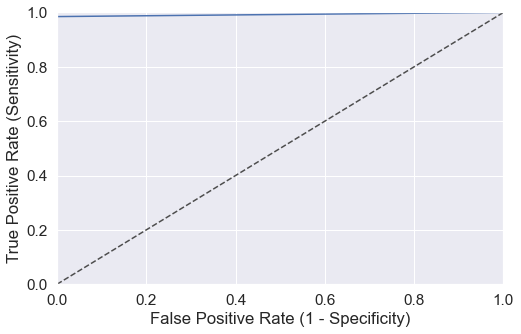

In [36]:
# ROC Curve   
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_class)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print ("\n")
print ("Area Under Curve (SVM): %.2f" %auc(fpr, tpr))
print ("\n")
plt.show()
a_u_c = auc(fpr, tpr)

In [37]:
matrix_table.append(["SVM", accuracy, classification_error, precision, 
               sensitivity, specificity, false_positive_rate, F1_measure, a_u_c, c_v_score,"{:.4f}".format(float(training_time)), 
               "{:.4f}".format((float)(test_time))])

## Random Forest

In [38]:
start=time.time()
rfc_clf = RandomForestClassifier()
params = {'n_estimators':[25,50,100,150,200,500],'max_depth':[0.5,1,5,10],'random_state':[1,10,20,42],
          'n_jobs':[1,2]}
grid_search_cv = GridSearchCV(rfc_clf, params, scoring='precision')
grid_search_cv.fit(X_train, Y_train)

end = time.time()
training_time = ((end-start)*1000)
print("time elapsed {} milli seconds".format((end-start)*1000))

time elapsed 758787.9407405853 milli seconds


In [39]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

RandomForestClassifier(max_depth=5, n_estimators=25, n_jobs=1, random_state=1)
{'max_depth': 5, 'n_estimators': 25, 'n_jobs': 1, 'random_state': 1}


In [40]:
start=time.time()
rfc_clf = grid_search_cv.best_estimator_
rfc_clf.fit(X_train,Y_train)
end = time.time()
training_time = training_time + ((end-start)*1000)
print("time elapsed {} milli seconds".format((end-start)*1000))

start=time.time()
rfc_clf_pred = rfc_clf.predict(X_test)
end = time.time()
test_time = format((end-start)*1000)
print("time elapsed {} milli seconds".format((end-start)*1000))
print('Accuracy:',accuracy_score(rfc_clf_pred,Y_test) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,Y_test).ravel()) #tn,fp,fn,tp
conf_matrix = confusion_matrix(rfc_clf_pred, Y_test)
print('Classification report:')
print(classification_report(rfc_clf_pred,Y_test))

time elapsed 132.37404823303223 milli seconds
time elapsed 9.034156799316406 milli seconds
Accuracy: 1.0
Confusion Matrix: [308   0   0 588]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       1.00      1.00      1.00       588

    accuracy                           1.00       896
   macro avg       1.00      1.00      1.00       896
weighted avg       1.00      1.00      1.00       896



[[308   0]
 [  9 579]]


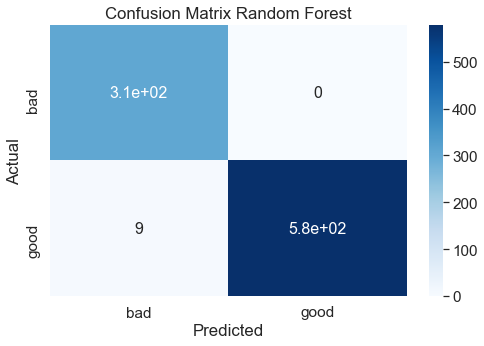

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred_class)
print(conf_matrix) #display confusion matrix
y_true = ["good", "bad"]
#y_pred = ["good", "bad"]
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm.dtypes
plt.figure(figsize = (8,5))
cm_title='Confusion Matrix' + " Random Forest"
plt.title(cm_title)
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
# Save the Pie
plt.savefig('../images/'+cm_title+'_confusion_matrix.png')

plt.show()

In [42]:
#[row, column]
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Classification Accuracy
# use float to perform true division, not integer division
accuracy = ((TP + TN) / float(TP + TN + FP + FN))
#accuracy = accuracy_score(Y_test, y_pred_class)
print("Accuracy : %.4f" %accuracy)

# Classification Error/Misclassification Rate = 1 - accuracy
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error Rate : %.4f" %(classification_error))

# Precision
precision = TP / float(TP + FP)
print("Precision : %.4f" %(precision))
#print("Precision : %.4f" %(precision_score(Y_test, y_pred)))

# Sensitivity or Recall or True Positive Rate
sensitivity = TP / float(FN + TP)
print("Sensitivity/Recall :%.4f" %(sensitivity))
#print("Sensitivity/Recall : %.4f" %(recall_score(Y_test, y_pred)))

# Specificity oe true negative rate
specificity = TN / (TN + FP)
print("Specificity : %.4f" %(specificity))

# False Positive Rate (1 - specificity))
false_positive_rate = FP / float(TN + FP)
print("False Positive Rate : %.4f" %(false_positive_rate))

# False Negative Rate
false_negative_rate = FN / float(TP + FN)
print("False Negative Rate : %.4f" %(false_negative_rate))

# F1 Measure (F1 Score) = 2 * ((precision * sensitivity)/(precision + sensitivity))
F1_measure = 2* ((precision * sensitivity)/(precision + sensitivity))
print("F1-Measure : %.4f" %(F1_measure))

# Cross Validation is used to check the model is not overfitting
c_v_score = cross_val_score(model,X_train,Y_train,cv = 10).mean()
print("cross val score: : %.4f" %(c_v_score))

Accuracy : 0.9900
Classification Error Rate : 0.0100
Precision : 1.0000
Sensitivity/Recall :0.9847
Specificity : 1.0000
False Positive Rate : 0.0000
False Negative Rate : 0.0153
F1-Measure : 0.9923
cross val score: : 0.9933




Area Under Curve (RF): 0.99




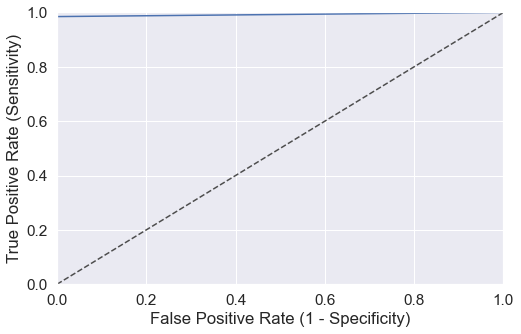

In [43]:
# ROC Curve   
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_class)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print ("\n")
print ("Area Under Curve (RF): %.2f" %auc(fpr, tpr))
print ("\n")
plt.show()
a_u_c = auc(fpr, tpr)

In [44]:
matrix_table.append(["Random Forest", accuracy, classification_error, precision, 
               sensitivity, specificity, false_positive_rate, F1_measure, a_u_c, c_v_score,"{:.4f}".format(float(training_time)), 
               "{:.4f}".format((float)(test_time))])

In [45]:
#print(matrix_table)

## Compare the metrics

In [46]:
#convert metrics table into a dataframe
metricsDF = pd.DataFrame(matrix_table, columns=['Model', 'Accuracy', 'Error Rate', 'Precision', 
    'Sensitivity', 'Specificity','False Positve Rate', 'F1_measure', 'ROC-AUC','Cross Validation Score','Model Training Time','Model Runtime on Test data'])
display(metricsDF)

,Model,Accuracy,Error Rate,Precision,Sensitivity,Specificity,False Positve Rate,F1_measure,ROC-AUC,Cross Validation Score,Model Training Time,Model Runtime on Test data
0,Logistic Regression,0.989955,0.010045,1.0,0.984694,1.0,0.0,0.992288,0.992347,0.993302,47.7698,1.4231
1,SVM,0.989955,0.010045,1.0,0.984694,1.0,0.0,0.992288,0.992347,0.993302,26351.0368,27.8621
2,Random Forest,0.989955,0.010045,1.0,0.984694,1.0,0.0,0.992288,0.992347,0.993302,758920.3148,9.0342


In [47]:
#switch the table to have the models as columns and statistics as rows
metricsDFT = metricsDF.transpose()
metricsDFT.columns = metricsDFT.iloc[0]
metricsDFT1=metricsDFT.drop('Model')
metricsDFT1

Model,Logistic Regression,SVM,Random Forest
Accuracy,0.989955,0.989955,0.989955
Error Rate,0.0100446,0.0100446,0.0100446
Precision,1,1,1
Sensitivity,0.984694,0.984694,0.984694
Specificity,1,1,1
False Positve Rate,0,0,0
F1_measure,0.992288,0.992288,0.992288
ROC-AUC,0.992347,0.992347,0.992347
Cross Validation Score,0.993302,0.993302,0.993302
Model Training Time,47.7698,26351.0368,758920.3148


## Model Selection

In [48]:
#Model Selection
# Logistic Regression, Random Forrest, CNN etc.